In [1]:
import numpy as np # Library for linear algebra and scientific computing
import pandas as pd # for data analysis and manipulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
import re # for regular expressions
import warnings # to ignore any warnings
import sys # for system-specific parameters and functions

In [2]:
data= pd.read_csv('dataset.csv') # read the dataset stored in the csv file

In [3]:
data.shape # check the shape of the dataset

(9568, 5)

In [4]:
# check first 5 rows of the dataset
data.head() 

,x1,x3,x4,x5,x2
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [5]:
# Add time column at the beginning of the dataset:
data['time'] = range(1, len(data) + 1)
data = data[['time', 'x1', 'x2', 'x3', 'x4', 'x5']] # reorder the columns

In [6]:
# Check if the new column was successfully created or not
data.columns

Index(['time', 'x1', 'x2', 'x3', 'x4', 'x5'], dtype='object')

In [7]:
# Check the datatypes of the columns
data.dtypes

time      int64
x1      float64
x2      float64
x3      float64
x4      float64
x5      float64
dtype: object

In [8]:
# Checking for the missing or null values:
data.isnull().sum().any()

np.False_

In [9]:
# Checking for the duplicated data:
data.duplicated().sum().any()

np.False_

In [11]:
# Check for full duplicate rows
duplicates = data[data.duplicated(keep=False)]

# See how many duplicates there are
print(len(duplicates))

0


In [10]:
# Basic info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    9568 non-null   int64  
 1   x1      9568 non-null   float64
 2   x2      9568 non-null   float64
 3   x3      9568 non-null   float64
 4   x4      9568 non-null   float64
 5   x5      9568 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 448.6 KB


In [11]:
# Knowing the summary statistics of the dataset
data.describe(exclude= ["int64"]) # time is not included in the summary statistics

,x1,x2,x3,x4,x5
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,454.365009,54.305804,1013.259078,73.308978
std,7.452473,17.066995,12.707893,5.938784,14.600269
min,1.810000,420.260000,25.360000,992.890000,25.560000
25%,13.510000,439.750000,41.740000,1009.100000,63.327500
50%,20.345000,451.550000,52.080000,1012.940000,74.975000
75%,25.720000,468.430000,66.540000,1017.260000,84.830000
max,37.110000,495.760000,81.560000,1033.300000,100.160000


In [12]:
'''# Z-score normalization for x1, x2, x3, x4, x5:
columns_to_normalize = ['x1', 'x2', 'x3', 'x4', 'x5']

# Apply Z-score Normalization
data[columns_to_normalize] = (data[columns_to_normalize] - data[columns_to_normalize].mean()) / data[columns_to_normalize].std()

# Display the first few rows of the normalized dataset:
data.head()'''

"# Z-score normalization for x1, x2, x3, x4, x5:\ncolumns_to_normalize = ['x1', 'x2', 'x3', 'x4', 'x5']\n\n# Apply Z-score Normalization\ndata[columns_to_normalize] = (data[columns_to_normalize] - data[columns_to_normalize].mean()) / data[columns_to_normalize].std()\n\n# Display the first few rows of the normalized dataset:\ndata.head()"

In [13]:
# Lets check the summary statistics after normalization
data.describe(exclude= ["int64"])

,x1,x2,x3,x4,x5
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,454.365009,54.305804,1013.259078,73.308978
std,7.452473,17.066995,12.707893,5.938784,14.600269
min,1.810000,420.260000,25.360000,992.890000,25.560000
25%,13.510000,439.750000,41.740000,1009.100000,63.327500
50%,20.345000,451.550000,52.080000,1012.940000,74.975000
75%,25.720000,468.430000,66.540000,1017.260000,84.830000
max,37.110000,495.760000,81.560000,1033.300000,100.160000


## **Task-1:**

### **Task-1.1: Time Series Analysis:**

Following time-series-plot shows how each valriable (`temperature`, `pressure`, `humidity`, `vacuum` and `energy output`) changes over time.

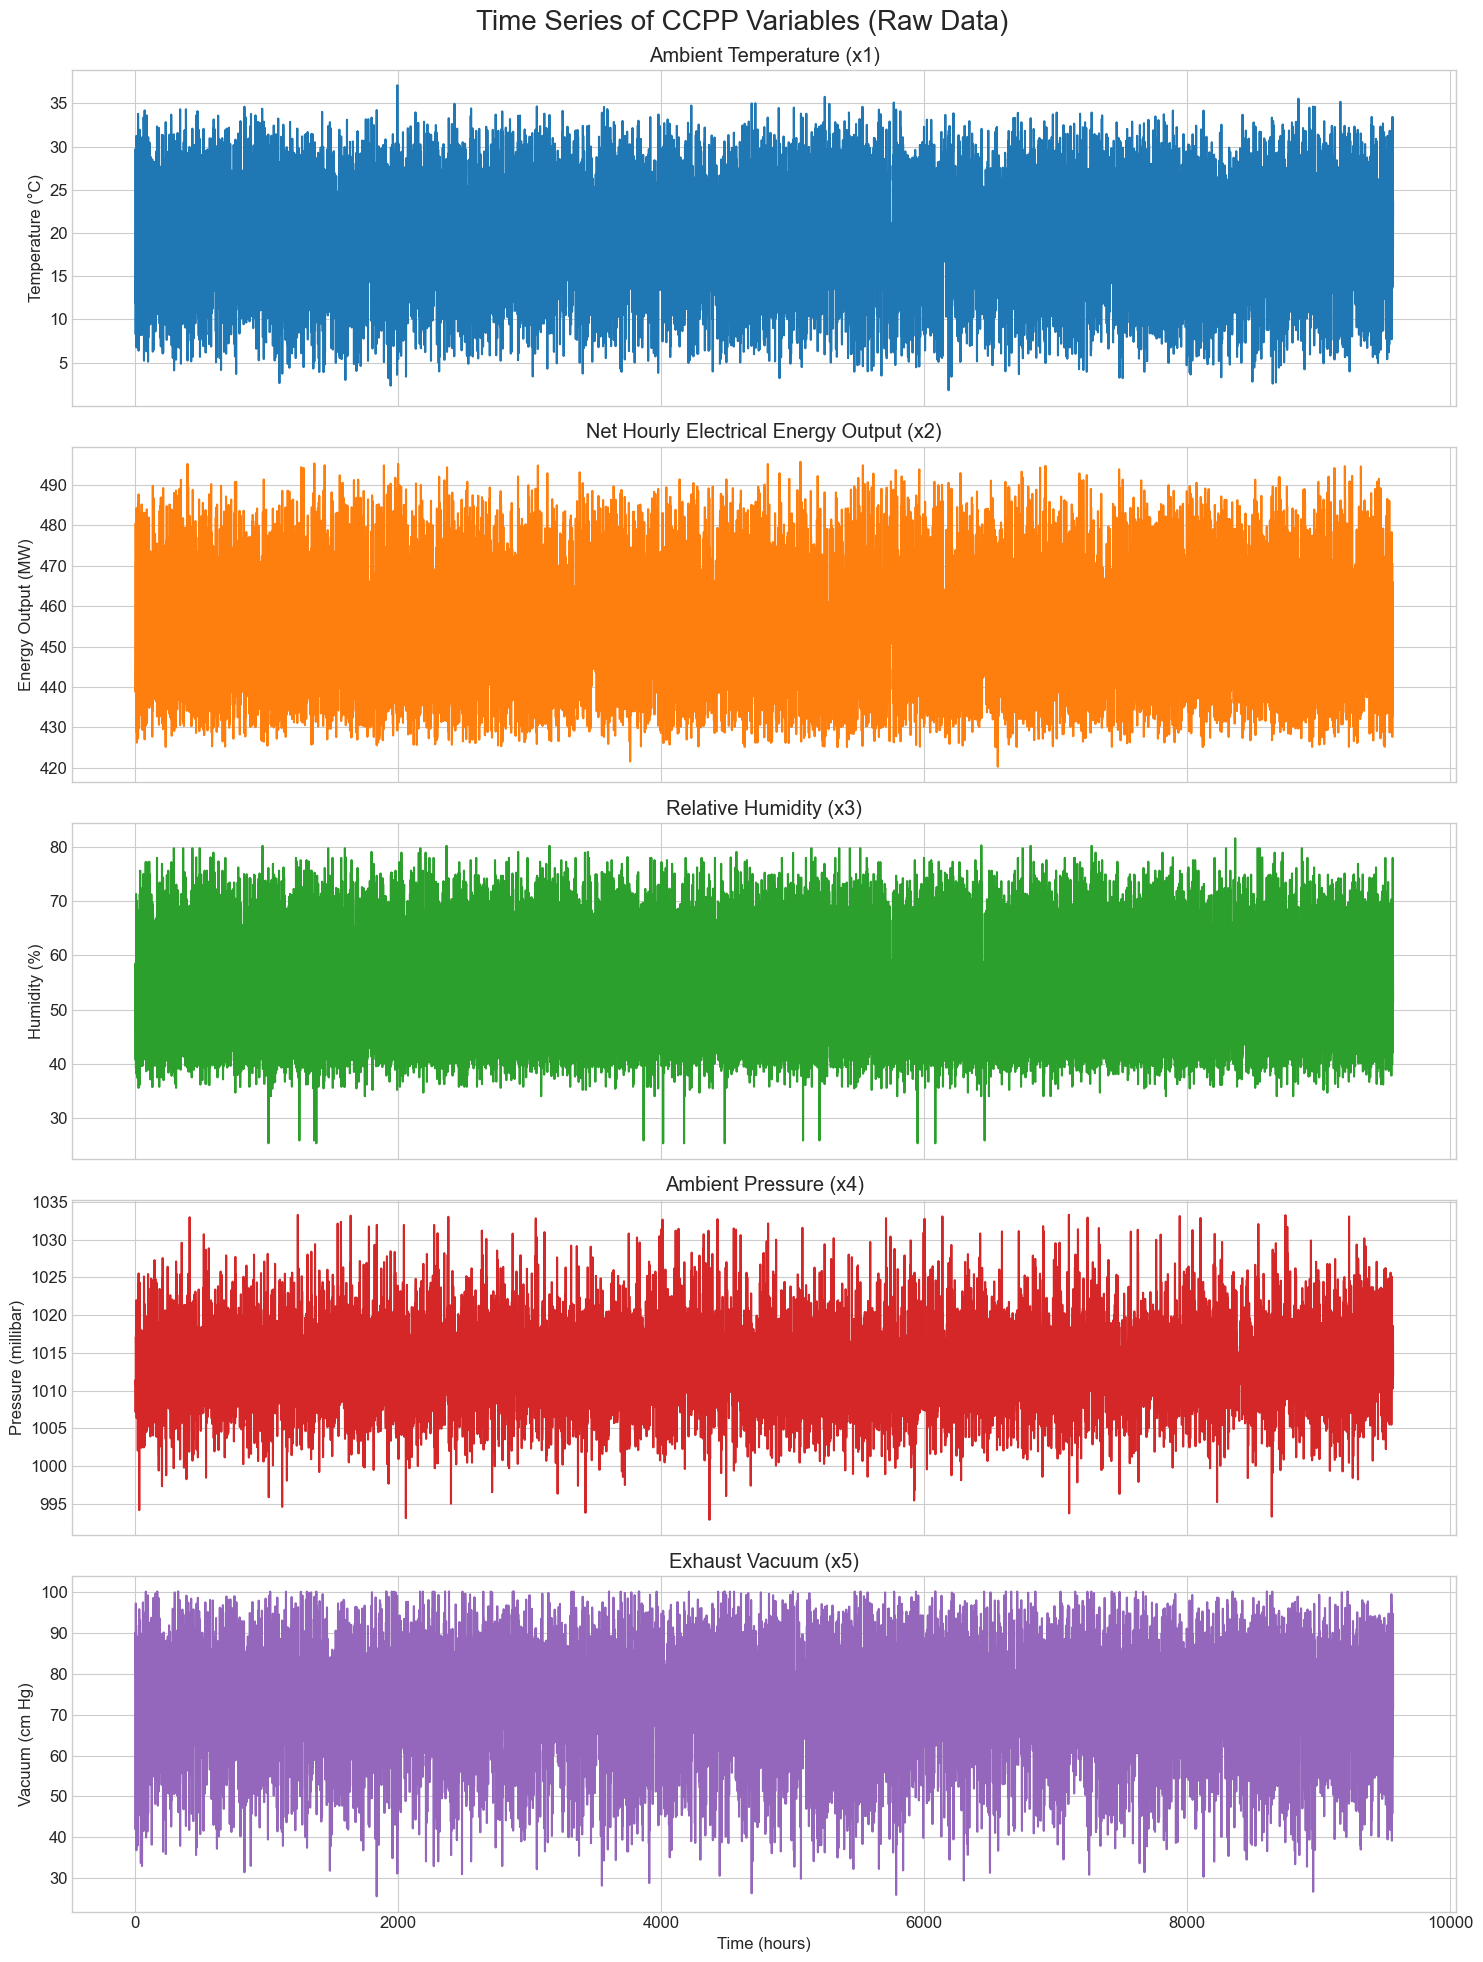

In [14]:
# Setting up the visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Create a figure with subplots for each variable
fig, axes = plt.subplots(5, 1, figsize=(15, 20), sharex=True)
fig.suptitle('Time Series of CCPP Variables (Raw Data)', fontsize=20)

# Plot each variable
axes[0].plot(data['time'], data['x1'], color='#1f77b4', linewidth=1.5)
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('Ambient Temperature (x1)')

axes[1].plot(data['time'], data['x2'], color='#ff7f0e', linewidth=1.5)
axes[1].set_ylabel('Energy Output (MW)')
axes[1].set_title('Net Hourly Electrical Energy Output (x2)')

axes[2].plot(data['time'], data['x3'], color='#2ca02c', linewidth=1.5)
axes[2].set_ylabel('Humidity (%)')
axes[2].set_title('Relative Humidity (x3)')

axes[3].plot(data['time'], data['x4'], color='#d62728', linewidth=1.5)
axes[3].set_ylabel('Pressure (millibar)')
axes[3].set_title('Ambient Pressure (x4)')

axes[4].plot(data['time'], data['x5'], color='#9467bd', linewidth=1.5)
axes[4].set_ylabel('Vacuum (cm Hg)')
axes[4].set_title('Exhaust Vacuum (x5)')

axes[4].set_xlabel('Time (hours)')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### **Distribution Analysis:**

#### **Task- 1.2: Histogram and Density Plots:**

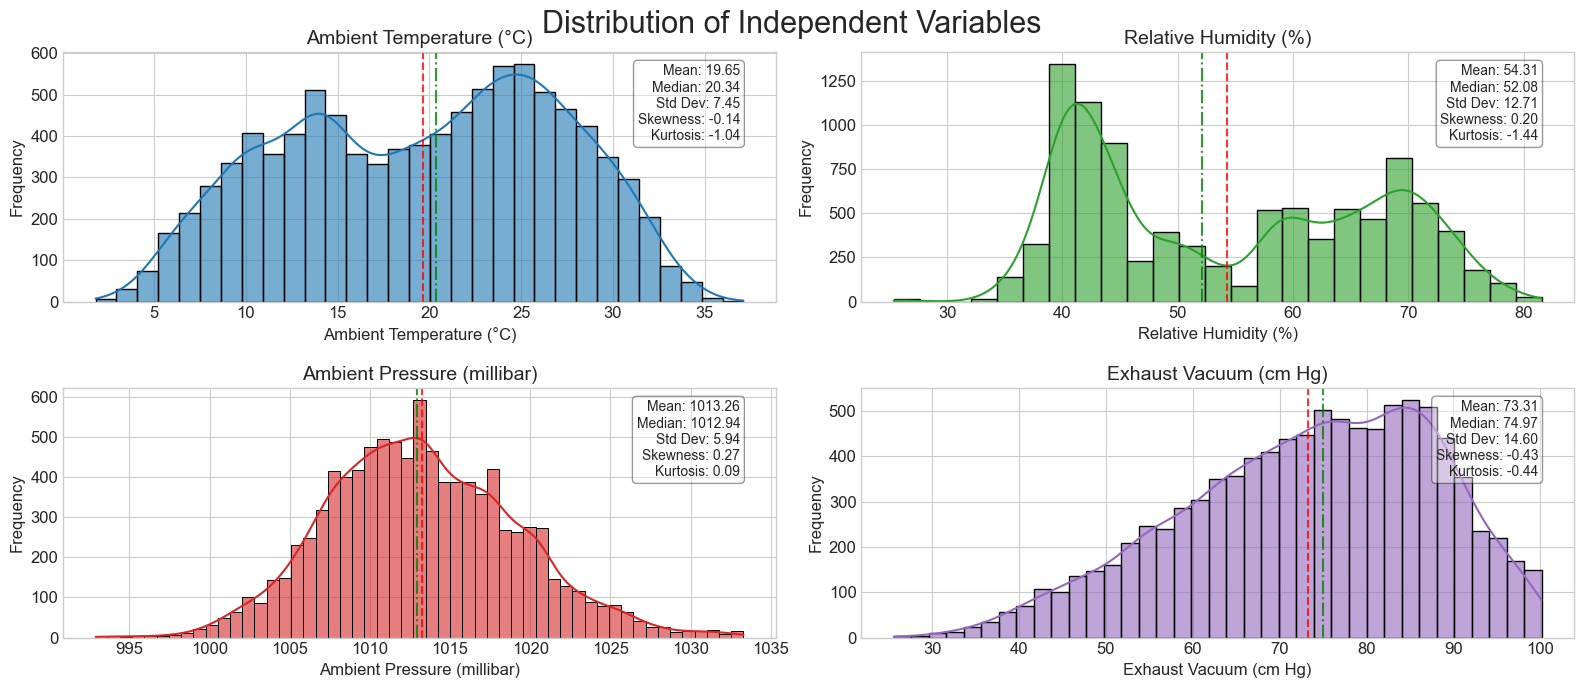

In [17]:
# Distribution Analysis: Histograms with Density Plots
from scipy import stats

# Setting up the visualization style
plt.style.use('seaborn-v0_8-whitegrid') 
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 8] # Adjusted figure size
plt.rcParams['font.size'] = 12 # Adjusted font size

# Create a figure for independent variables (x1, x3, x4, x5)
fig, axes = plt.subplots(2, 2, figsize=(16, 7))
fig.suptitle('Distribution of Independent Variables', fontsize=22, y=0.98)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Independent variables and their labels
independent_vars = ['x1', 'x3', 'x4', 'x5']
var_labels = ['Ambient Temperature (°C)', 'Relative Humidity (%)', 
              'Ambient Pressure (millibar)', 'Exhaust Vacuum (cm Hg)']
colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd']

# Plot histograms with density curves for independent variables
for i, (var, label, color) in enumerate(zip(independent_vars, var_labels, colors)):
    # Calculate statistics
    mean_val = data[var].mean()
    median_val = data[var].median()
    std_val = data[var].std()
    skew_val = stats.skew(data[var])
    kurt_val = stats.kurtosis(data[var])
    
    # Create histogram with density plot
    sns.histplot(data[var], kde=True, color=color, alpha=0.6, ax=axes[i])
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='-.', alpha=0.8, label=f'Median: {median_val:.2f}')
    
    # Add distribution statistics as text
    stats_text = (f"Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\n"
                 f"Std Dev: {std_val:.2f}\nSkewness: {skew_val:.2f}\n"
                 f"Kurtosis: {kurt_val:.2f}")
    
    # Position the text box in the upper right corner
    axes[i].text(0.95, 0.95, stats_text, transform=axes[i].transAxes, 
                fontsize=10, va='top', ha='right', 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.4))
    
    axes[i].set_title(label, fontsize=14)
    axes[i].set_xlabel(label, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

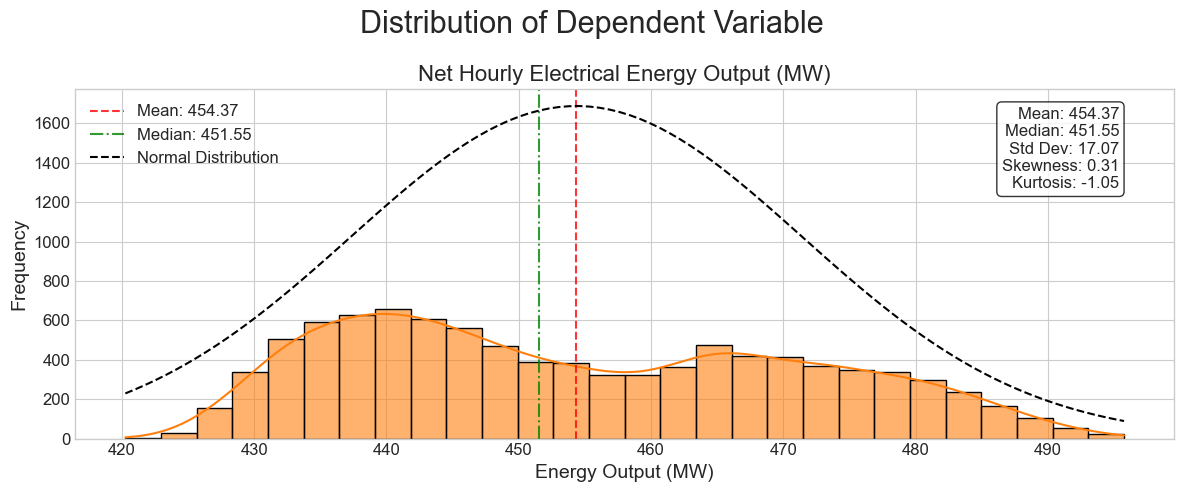

In [18]:
# Create a separate figure for the dependent variable (x2)
plt.figure(figsize=(12, 5))
plt.suptitle('Distribution of Dependent Variable', fontsize=22, y=0.98)

# Calculate statistics for x2
mean_val = data['x2'].mean()
median_val = data['x2'].median()
std_val = data['x2'].std()
skew_val = stats.skew(data['x2'])
kurt_val = stats.kurtosis(data['x2'])

# Create histogram with density plot for x2
ax = sns.histplot(data['x2'], kde=True, color='#ff7f0e', alpha=0.6)

# Add vertical lines for mean and median
plt.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-.', alpha=0.8, label=f'Median: {median_val:.2f}')

# Add normal distribution curve for comparison
x = np.linspace(data['x2'].min(), data['x2'].max(), 100)
y = stats.norm.pdf(x, mean_val, std_val)
y = y * (len(data) * (data['x2'].max() - data['x2'].min()) / 10)  # Scale to match histogram
plt.plot(x, y, 'k--', linewidth=1.5, label='Normal Distribution')

# Add distribution statistics as text
stats_text = (f"Mean: {mean_val:.2f}\nMedian: {median_val:.2f}\n"
             f"Std Dev: {std_val:.2f}\nSkewness: {skew_val:.2f}\n"
             f"Kurtosis: {kurt_val:.2f}")

# Position the text box in the upper right corner
plt.text(0.95, 0.95, stats_text, transform=ax.transAxes, 
        fontsize=12, va='top', ha='right', 
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title('Net Hourly Electrical Energy Output (MW)', fontsize=16)
plt.xlabel('Energy Output (MW)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('dependent_var_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### **Task 1.4: Outliers Detection:**

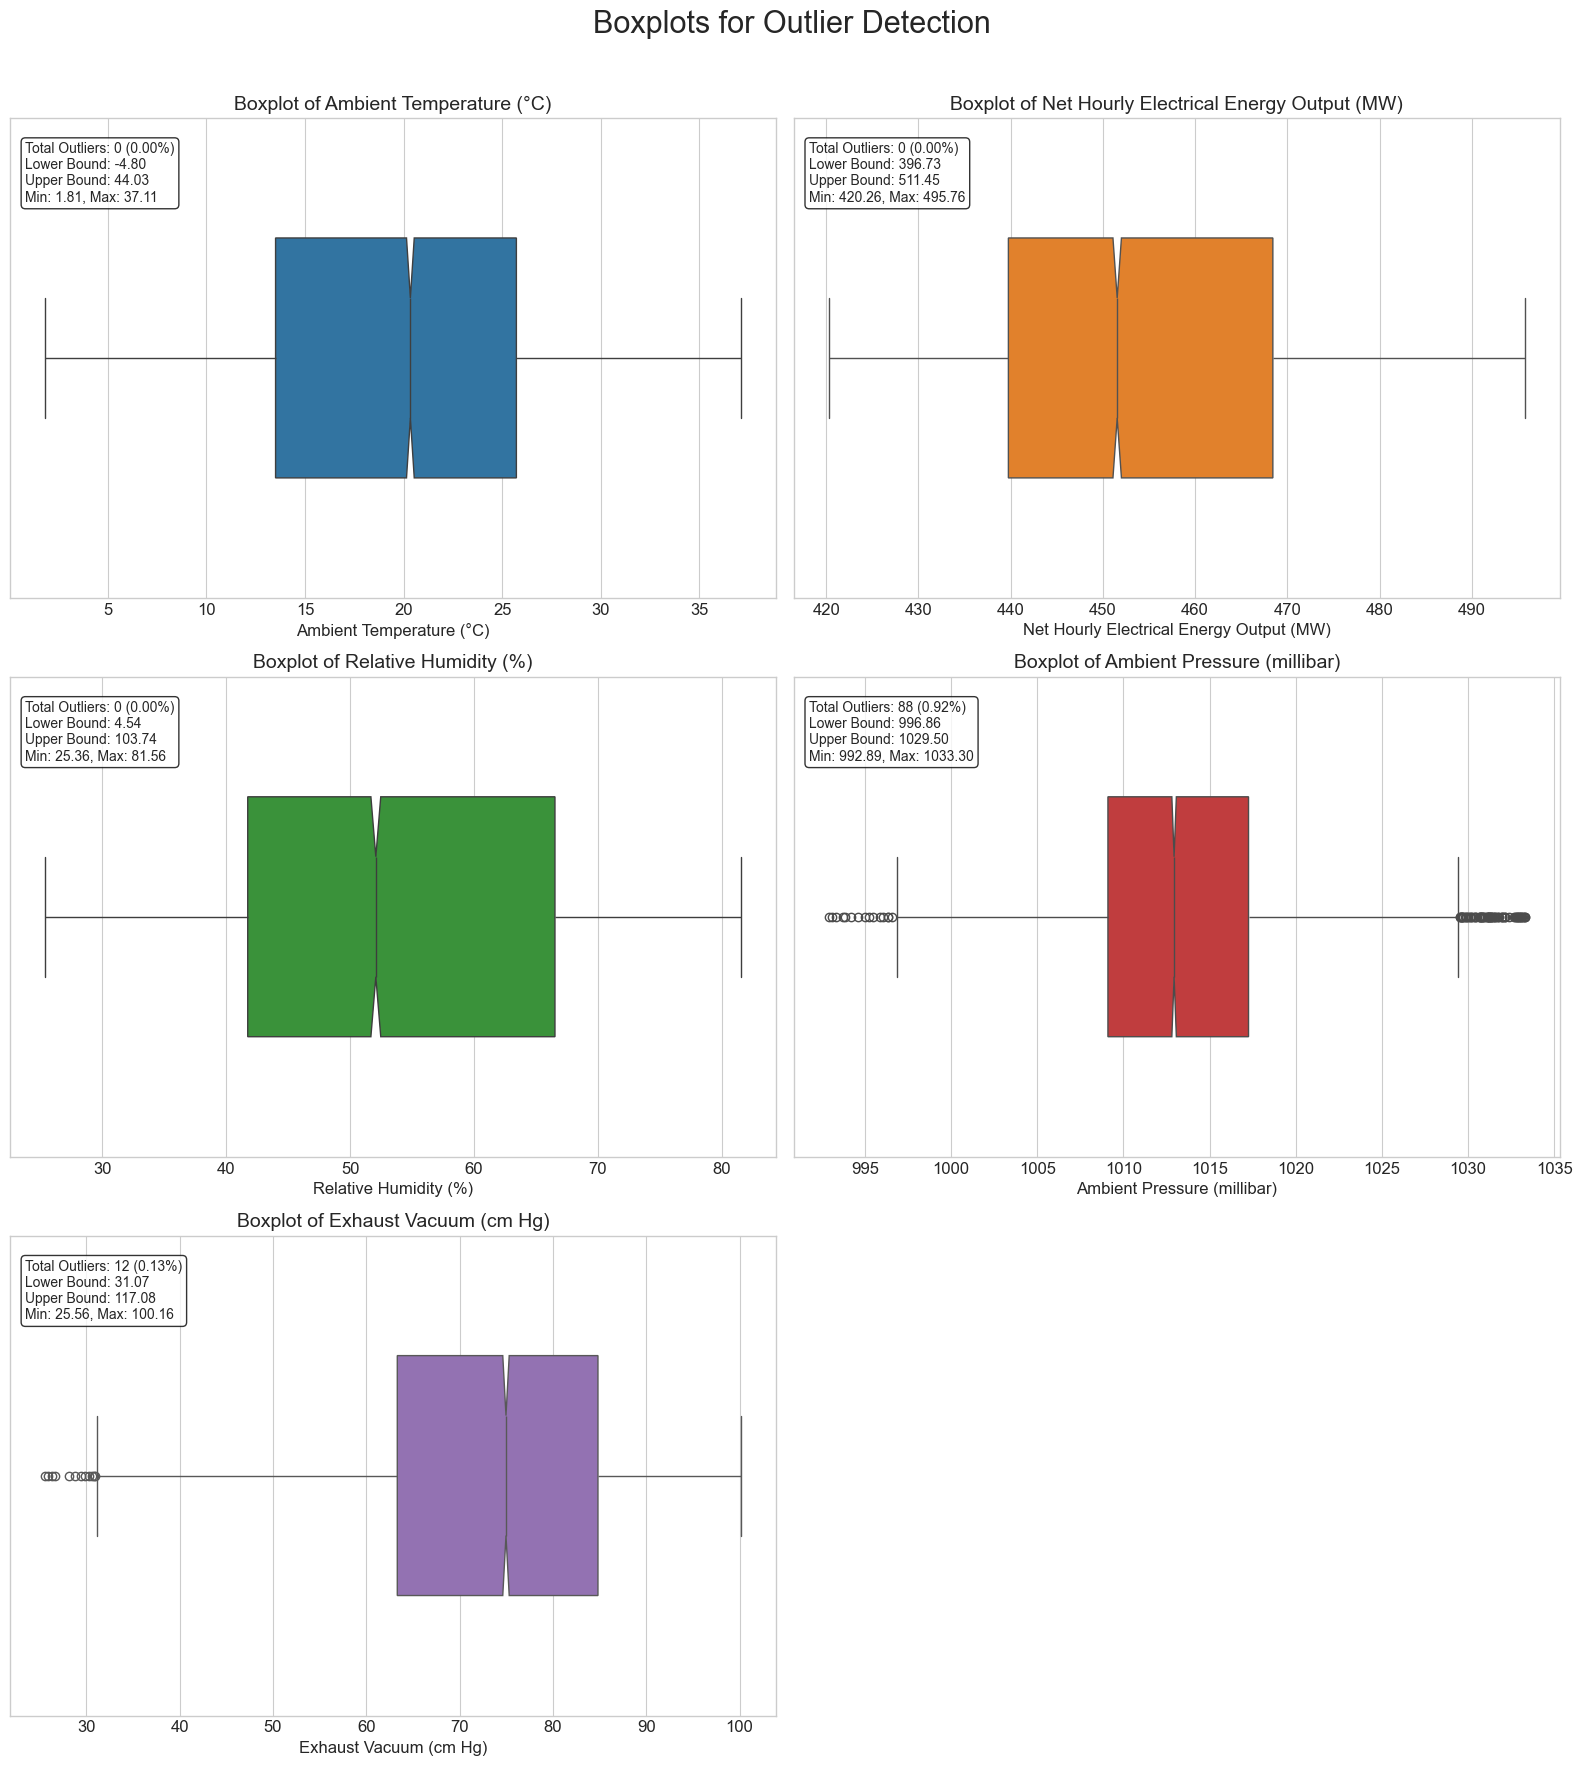

In [20]:
# Setting up the visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column, k=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Create boxplots to visualize outliers
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('Boxplots for Outlier Detection', fontsize=22, y=0.98)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# All variables and their labels
all_vars = ['x1', 'x2', 'x3', 'x4', 'x5']
all_labels = ['Ambient Temperature (°C)', 'Net Hourly Electrical Energy Output (MW)', 
              'Relative Humidity (%)', 'Ambient Pressure (millibar)', 'Exhaust Vacuum (cm Hg)']
all_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Dictionary to store outliers for each variable
outliers_dict = {}

# Create boxplots and detect outliers for each variable
for i, (var, label, color) in enumerate(zip(all_vars, all_labels, all_colors)):
    # Create boxplot
    sns.boxplot(x=data[var], ax=axes[i], color=color, width=0.5, notch=True)
    
    # Detect outliers
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data, var)
    outliers_dict[var] = outliers
    
    # Add outlier count to the plot
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(data)) * 100
    
    # Add statistics as text
    stats_text = (f"Total Outliers: {outlier_count} ({outlier_percent:.2f}%)\n"
                 f"Lower Bound: {lower_bound:.2f}\n"
                 f"Upper Bound: {upper_bound:.2f}\n"
                 f"Min: {data[var].min():.2f}, Max: {data[var].max():.2f}")
    
    axes[i].text(0.02, 0.95, stats_text, transform=axes[i].transAxes, 
                fontsize=10, va='top', ha='left', 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    axes[i].set_title(f'Boxplot of {label}', fontsize=14)
    axes[i].set_xlabel(label, fontsize=12)

# Remove the unused subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### **Task 1.5: Scatter Plot Matrix:**

<Figure size 2000x1600 with 0 Axes>

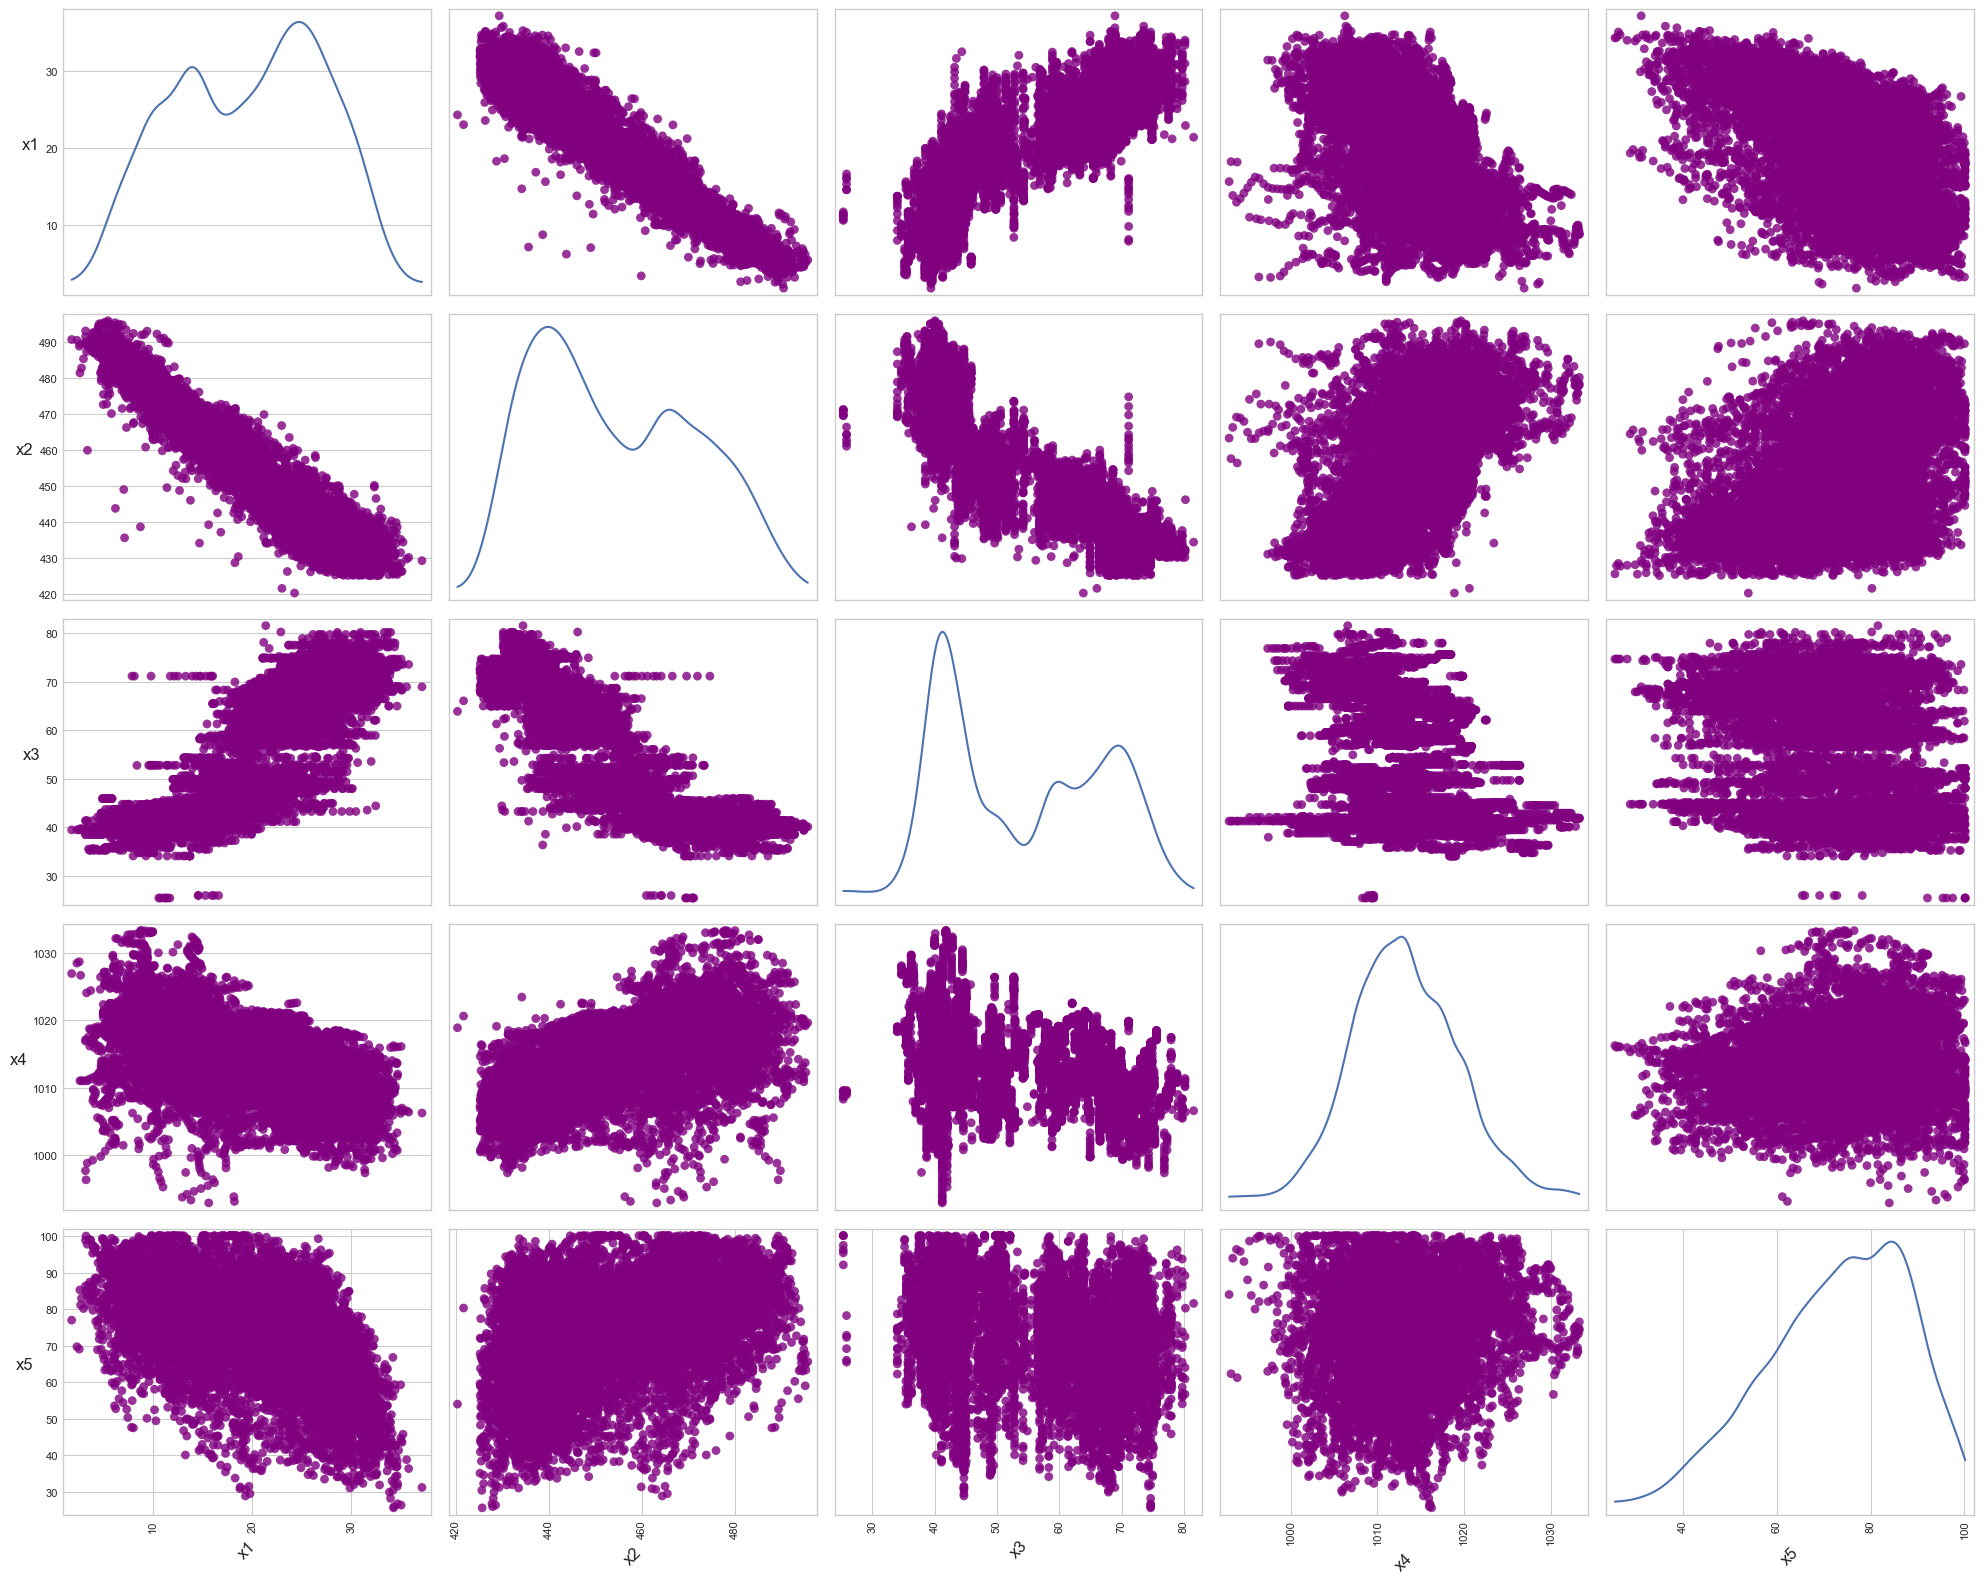

In [25]:
# Create a scatter plot matrix to visualize outliers in multivariate space:

all_vars = ['x1', 'x2', 'x3', 'x4', 'x5']

plt.figure(figsize=(20, 16))
scatter_matrix = pd.plotting.scatter_matrix(data[all_vars], figsize=(20, 16), 
                                           diagonal='kde', alpha=0.8, 
                                           marker='o', s=40, color='purple')

# Adjust the appearance of the scatter matrix:
for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(45)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.show()

### **Task 1.6: Correlation Analysis:**

In [26]:
# Calculate the correlation matrix

# I use pearson correlation coefficient to measure the  relationship:
correlation_matrix = data.corr(method='pearson')

# Display the correlation matrix as a table
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          time        x1        x2        x3        x4        x5
time  1.000000 -0.006899  0.008107 -0.001902  0.022047  0.010369
x1   -0.006899  1.000000 -0.948128  0.844107 -0.507549 -0.542535
x2    0.008107 -0.948128  1.000000 -0.869780  0.518429  0.389794
x3   -0.001902  0.844107 -0.869780  1.000000 -0.413502 -0.312187
x4    0.022047 -0.507549  0.518429 -0.413502  1.000000  0.099574
x5    0.010369 -0.542535  0.389794 -0.312187  0.099574  1.000000


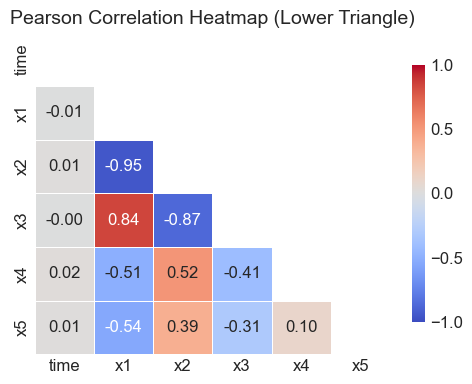

In [27]:
# Create a mask for the upper triangle: 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a correlation heatmap: show lower triangle only:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, 
            mask=mask, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, vmax=1, 
            fmt='.2f', 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8})
plt.title('Pearson Correlation Heatmap (Lower Triangle)', fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()